In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import  LabelEncoder, OrdinalEncoder, MinMaxScaler, StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from sklearn.compose import ColumnTransformer

from sklearn.model_selection import train_test_split, KFold, cross_val_score, cross_validate, GridSearchCV

from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.svm import SVR
from sklearn.linear_model import SGDRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor

from sklearn import metrics

# 1.Импорт данных и описание

In [3]:
from google.colab import drive
drive.mount('/content/drive')
#audio_path = '/content/drive/MyDrive/Colab Notebooks/Af.mp3'
df_bp = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/ВКР/X_bp_v1.xlsx',index_col=0)
df_nup = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/ВКР/X_nup.xlsx',index_col=0)

In [4]:
#Загрузить локально
df_bp = pd.read_excel("X_bp_v1.xlsx",index_col=0)
df_nup = pd.read_excel("X_nup.xlsx",index_col=0)

In [3]:
#Посмотрим исходные данные
print('df_bp ',df_bp.shape)
print('df_nup ',df_nup.shape)

df_bp  (1023, 10)
df_nup  (1040, 3)


Видно, что даные имеют разную размерность, часть данных при объединении потеряется

In [4]:
#Объединим 2 датасета
df = df_nup.join(df_bp,  how='inner')
df_rows = df.copy()
df_col = df.columns.to_list()
df_col

['Угол нашивки, град',
 'Шаг нашивки',
 'Плотность нашивки',
 'Соотношение матрица-наполнитель',
 'Плотность, кг/м3',
 'модуль упругости, ГПа',
 'Количество отвердителя, м.%',
 'Содержание эпоксидных групп,%_2',
 'Температура вспышки, С_2',
 'Поверхностная плотность, г/м2',
 'Модуль упругости при растяжении, ГПа',
 'Прочность при растяжении, МПа',
 'Потребление смолы, г/м2']

посмотрим, что из себя представляют данные

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1023 entries, 0 to 1022
Data columns (total 13 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Угол нашивки, град                    1023 non-null   int64  
 1   Шаг нашивки                           1023 non-null   float64
 2   Плотность нашивки                     1023 non-null   float64
 3   Соотношение матрица-наполнитель       1023 non-null   float64
 4   Плотность, кг/м3                      1023 non-null   float64
 5   модуль упругости, ГПа                 1023 non-null   float64
 6   Количество отвердителя, м.%           1023 non-null   float64
 7   Содержание эпоксидных групп,%_2       1023 non-null   float64
 8   Температура вспышки, С_2              1023 non-null   float64
 9   Поверхностная плотность, г/м2         1023 non-null   float64
 10  Модуль упругости при растяжении, ГПа  1023 non-null   float64
 11  Прочность при рас

нулевые значения отсутствуют

In [5]:
df.describe()

,"Угол нашивки, град",Шаг нашивки,Плотность нашивки,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2"
count,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000
mean,44.252199,6.903132,57.199873,2.930366,1975.734888,739.923233,110.956125,22.223949,286.228042,482.731833,73.328571,2466.922843,218.423144
std,45.015793,2.555973,12.224931,0.913222,73.729231,330.231581,28.117771,2.384606,40.553076,281.314690,3.118983,485.628006,59.735931
min,0.000000,0.037639,11.740126,0.389403,1731.764635,2.436909,17.740275,14.254985,160.255843,0.603740,64.054061,1036.856605,33.803026
25%,0.000000,5.080033,49.799212,2.317887,1924.155467,500.047452,92.577613,20.608034,259.170041,266.816645,71.245018,2135.850448,179.627520
50%,0.000000,6.916144,57.341920,2.906878,1977.621657,739.664328,110.689775,22.181806,286.701065,451.864365,73.268805,2459.524526,219.198882
75%,90.000000,8.586293,64.944961,3.552660,2021.374375,961.812526,129.730366,23.961468,313.002106,693.225017,75.356612,2767.193119,257.481724
max,90.000000,14.440522,103.988901,5.591742,2207.773481,1911.536477,198.953207,28.955094,413.273418,1399.542362,82.682051,3848.436732,414.590628


# 2. Графическое представление **даннных**

"Ящики с усами"

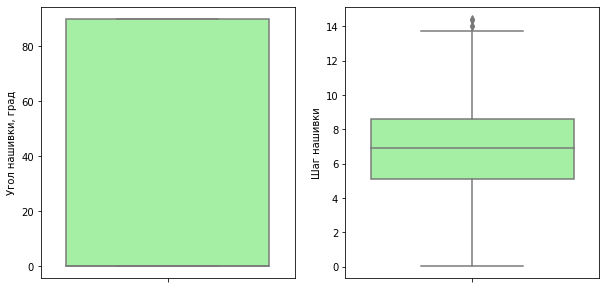

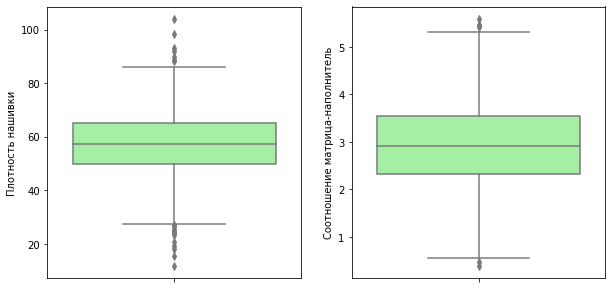

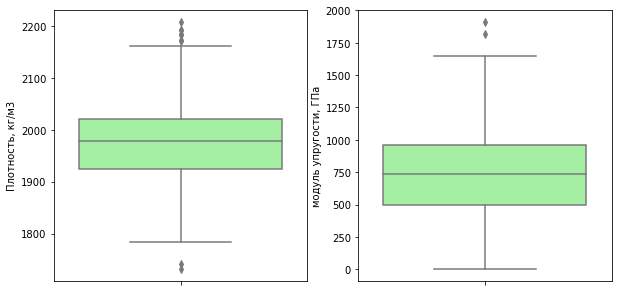

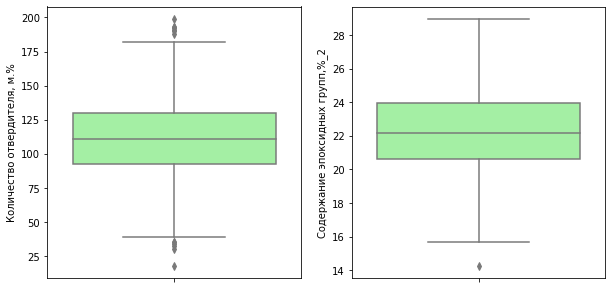

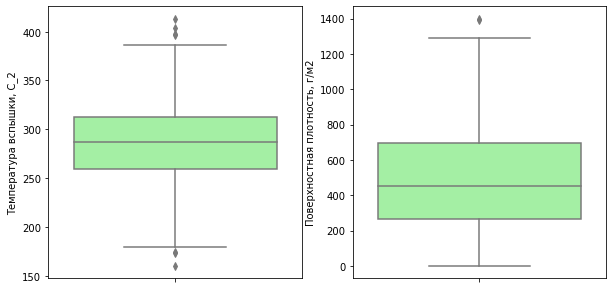

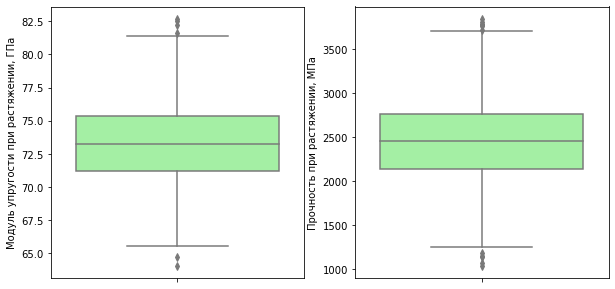

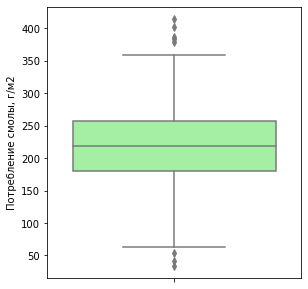

In [6]:
i=1
for elem in df.columns:   
    if i%2 != 0:
        fig = plt.figure(figsize=(10,5))
        ax = fig.add_subplot(121)
        sns.boxplot(y = df[elem], color = 'palegreen')
    else:
        ax = fig.add_subplot(122)
        sns.boxplot(y = df[elem], color = 'palegreen')
        plt.savefig('out_pics/boxplot//BoxPlot'+str(i))
    i+=1 
#Печать последней нечетной
plt.savefig('out_pics/boxplot//BoxPlot'+str(i))    
plt.show()  


Гистограммы

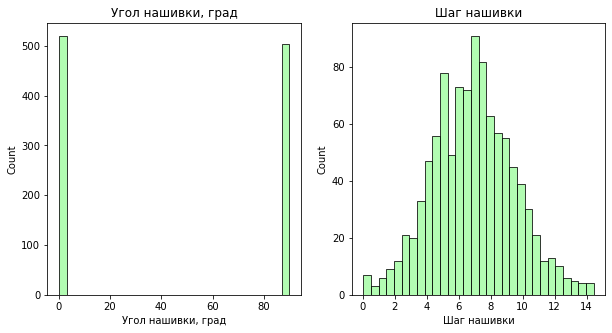

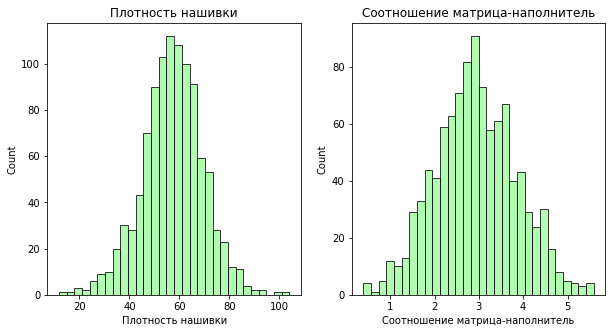

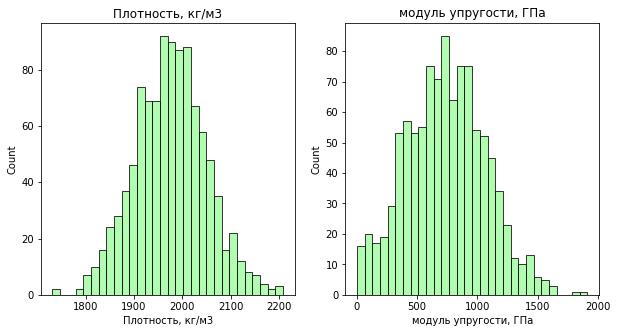

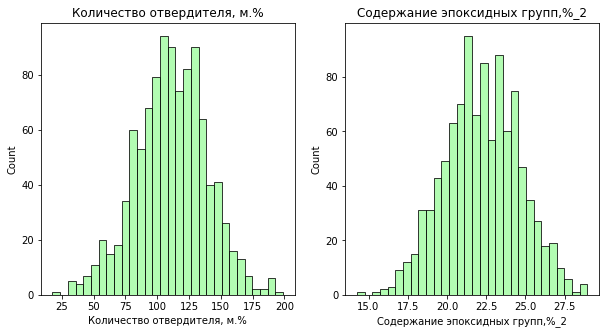

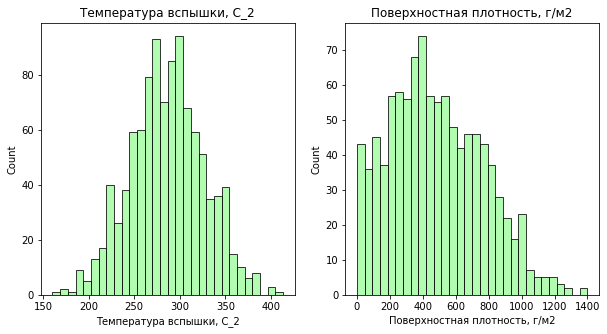

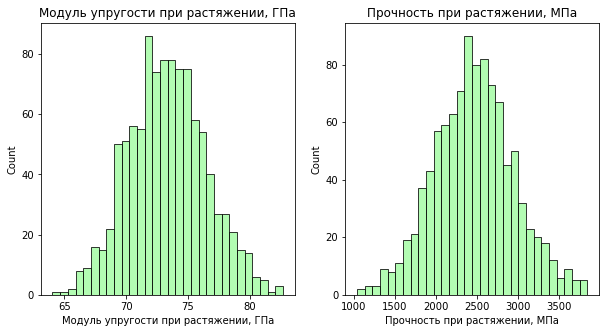

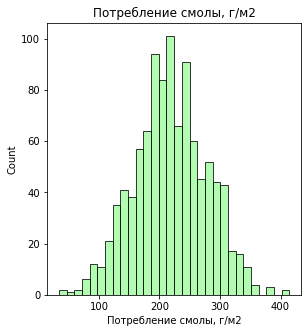

In [7]:
i=1
for elem in df.columns:   
    if i%2 != 0:
        fig = plt.figure(figsize=(10,5))
        ax = fig.add_subplot(121)
        sns.histplot(df[elem], kde=False, bins=30, color='palegreen')
        
        plt.title(elem)
    else:
        ax = fig.add_subplot(122)
        sns.histplot(df[elem], kde=False, bins=30, color='palegreen')
        
        plt.title(elem)
        plt.savefig('out_pics/hist//hist'+str(i))    
    i+=1   
plt.savefig('out_pics/hist//hist'+str(i)) 
plt.show()      

Попарные графики точек рассеяния

In [ ]:
columns = df.columns
g = sns.PairGrid(df[columns])
g.map(sns.scatterplot, color ='green')
g.savefig("out_pics//pairgrid") 

Тепловая карта корреляции

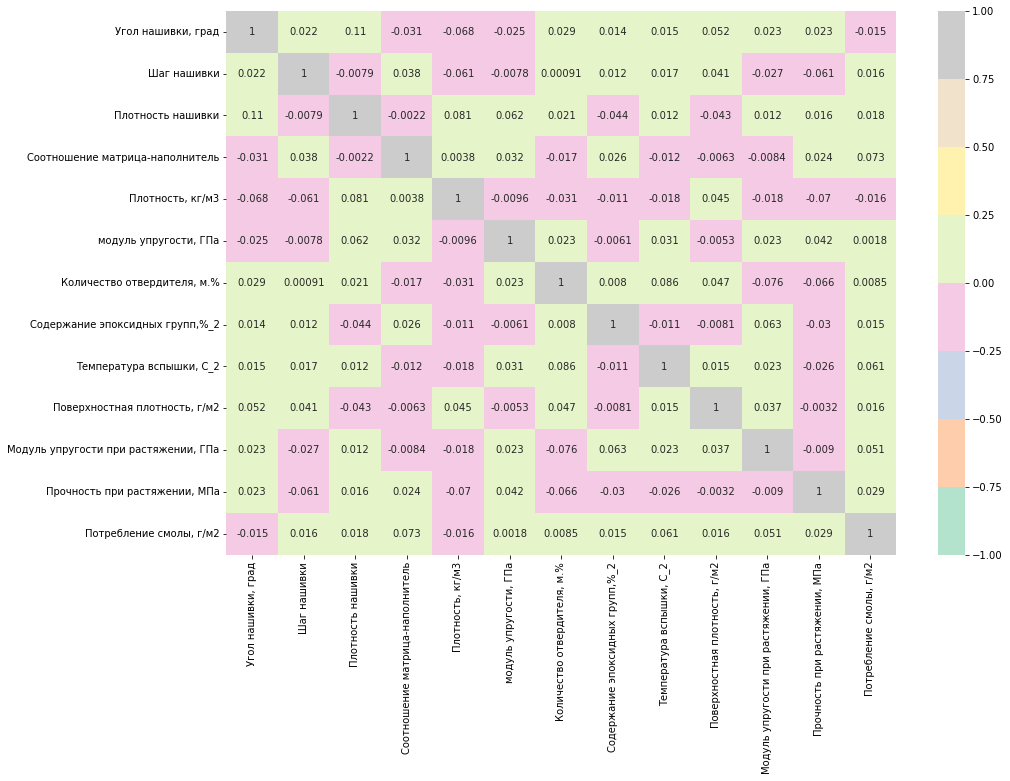

In [9]:
g = plt.figure(figsize=(15,10))
sns.heatmap(df.corr(), vmin = -1, vmax = +1, annot = True, cmap = 'Pastel2')
g.savefig("out_pics//heatmap") 

Вывод по разделу. 
Представленные данные имеют слабые корреляции друг с другом. Есть предположение о том, что данные были искусственно составлены, начиная с 23 позиции на основании первых значений.

# 3. Предобработка данных

По плану исследования предполагается подготовить 4 варианта исходных данных
1. Исходный предложенный вариант
2. Измененный вариант №1 
   2.1. Формируем 23 таблицы, предполагая, что первые 23 строки - эталонные
   2.2. По методу среднеквадратичного отклонения заполняем эти таблицы 44 строками (11 последних отбросим) таким образом, чтобы строка №2 была максимально похожа на эталонную, №3 - менее и так далее.
   2.3. В каждой таблице по первым 20 строкам поставим равным 0 значения по столбцам, выходящие за пределы
            max = q75+(1*(q75-q25))
            min = q25-(1*(q75-q25))
   2.4. Заменим нули средними значениями по столбцу
   2.5. Посчитаем % замены
3. Измененный вариант №2
   Аналогично варианту №1. Строк - 10, интервал - 0,5   
4. Измененный вариант №3
   Аналогично варианту №1. Строк - 5, интервал - 0      

## 3.1. Исходный вариант 

In [10]:
#Проверяем наличие признаков с повторениями более 90%
num_rows = len(df.index)
low_information_cols = [] #

for col in df.columns:
    cnts = df[col].value_counts(dropna=False)
    top_pct = (cnts/num_rows).iloc[0]
    
    if top_pct > 0.90:
        low_information_cols.append(col)
        print('{0}: {1:.5f}%'.format(col, top_pct*100))
        print(cnts)
    else:
        print(f'По колонкке {col} повторений не обнаружено')    


По колонкке Угол нашивки, град повторений не обнаружено
По колонкке Шаг нашивки повторений не обнаружено
По колонкке Плотность нашивки повторений не обнаружено
По колонкке Соотношение матрица-наполнитель повторений не обнаружено
По колонкке Плотность, кг/м3 повторений не обнаружено
По колонкке модуль упругости, ГПа повторений не обнаружено
По колонкке Количество отвердителя, м.% повторений не обнаружено
По колонкке Содержание эпоксидных групп,%_2 повторений не обнаружено
По колонкке Температура вспышки, С_2 повторений не обнаружено
По колонкке Поверхностная плотность, г/м2 повторений не обнаружено
По колонкке Модуль упругости при растяжении, ГПа повторений не обнаружено
По колонкке Прочность при растяжении, МПа повторений не обнаружено
По колонкке Потребление смолы, г/м2 повторений не обнаружено


In [11]:
#Удалим выбросы
for column in df.columns:
    q75,q25 = np.percentile(df.loc[:,column],[75,25])
    intr_qr = q75-q25

    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)

    df.loc[df[column] < min,column] = np.nan
    df.loc[df[column] > max,column] = np.nan
df.isnull().sum()

Угол нашивки, град                       0
Шаг нашивки                              4
Плотность нашивки                       20
Соотношение матрица-наполнитель          6
Плотность, кг/м3                         9
модуль упругости, ГПа                    2
Количество отвердителя, м.%             13
Содержание эпоксидных групп,%_2          1
Температура вспышки, С_2                 7
Поверхностная плотность, г/м2            2
Модуль упругости при растяжении, ГПа     6
Прочность при растяжении, МПа           11
Потребление смолы, г/м2                  8
dtype: int64

In [305]:
df = df.dropna(axis = 0)
df.describe()


,"Угол нашивки, град",Шаг нашивки,Плотность нашивки,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2"
count,939.000000,939.000000,939.000000,939.000000,939.000000,939.000000,939.000000,939.000000,939.000000,939.000000,939.000000,939.000000,939.000000
mean,45.910543,6.906270,57.453646,2.924054,1974.165561,738.722313,111.185898,22.198379,286.216086,482.973687,73.303087,2468.125173,217.706196
std,45.014763,2.511058,11.234014,0.893862,70.742162,328.503375,26.990905,2.393059,39.366042,280.554016,3.040224,463.999614,57.797371
min,0.000000,0.037639,27.272928,0.547391,1784.482245,2.436909,38.668500,15.695894,179.374391,0.603740,65.553336,1250.392802,63.685698
25%,0.000000,5.115560,50.209564,2.319244,1923.536424,500.047452,92.620105,20.576246,259.211711,264.410240,71.229278,2146.295983,179.627520
50%,90.000000,6.936649,57.565188,2.903305,1977.339047,738.736842,111.200954,22.141560,286.890669,456.908047,73.253725,2459.524526,218.946348
75%,90.000000,8.586293,64.798402,3.543610,2020.369531,959.442359,129.884490,23.961468,312.885525,695.955726,75.311290,2757.772535,256.510318
max,90.000000,13.732404,86.012427,5.314144,2161.565216,1649.415706,181.828448,28.955094,386.067992,1291.340115,81.417126,3705.672523,359.052220


## 3.2. Варианты 2, 3, 4

In [13]:
def create(df_rows):
    df_lost = df_rows[23:].copy()
    s = df_rows[:23]
    names = []
    d={}
    for i in range(0,23):
        n1 = 'data'+str(i)
        names.append(n1)
        d[n1] = pd.DataFrame(columns=s.columns)
        d[n1].loc[s.index[i]] = s.iloc[i]
    for i in range(1,44):

        for j in range(0,23):
            diff_df = df_lost - s[j:j+1].values
            n_str= diff_df.apply(np.linalg.norm, axis=1).idxmin()
            
            n1 = 'data'+str(j)
            d[n1].loc[n_str] = df_lost.loc[n_str]
            df_lost.drop(labels = [n_str],inplace = True)
    
    return d

In [14]:
def change(per, col, d_obr, df_col, n):
    Dict_com = {}
    Dict_data = {}
    sNul=0
    r = 0
    for name in n:
        data = d_obr[name]
        r = r+(d_obr[name].shape[0]*d_obr[name].shape[1])
    
        for x in df_col:     
            q75,q25 = np.percentile(data[:col].loc[:,x],[75,25])
            intr_qr = q75-q25
            max = q75+(per*intr_qr)
            min = q25-(per*intr_qr)   
            #intr_qr = (data[:col].loc[:,x]).mean()
            #min = intr_qr*(1-per)
            #max = intr_qr*(1+per)
            data.loc[data[x] < min,x] = np.nan
            data.loc[data[x] > max,x] = np.nan
            sNul = sNul + data[x].isnull().sum() #Посчитаем сколько нулей появилось
            #data[x] = data[x].fillna(data.loc[:,x].mean())
            data[x] = data[x].fillna(data.loc[:,x].mean()) 
    df_ = pd.concat([d_obr['data0'],d_obr['data1'],d_obr['data2'], d_obr['data3'], d_obr['data4'],
                          d_obr['data5'],d_obr['data6'],d_obr['data7'], d_obr['data8'], d_obr['data9'],
                          d_obr['data10'],d_obr['data11'],d_obr['data12'], d_obr['data13'], d_obr['data14'],
                          d_obr['data15'],d_obr['data16'],d_obr['data17'], d_obr['data18'], d_obr['data19'],
                          d_obr['data20'],d_obr['data21'],d_obr['data22']])
    #размер датафрейма
    
    print(f'Всего удалено {13299-r} значений, заменено {sNul} что вместе составляет {((13299-r+sNul)/13299*100).round(2)}% от общей базы')
    return df_

In [15]:
def d_names():   
    names = []
    for i in range(0,23):
        n1 = 'data'+str(i)
        names.append(n1)
    return names

In [17]:
d_name = d_names()

In [18]:
df_union2 = change(1,20, create(df_rows), df_col, d_name)

Всего удалено 143 значений, заменено 1485 что вместе составляет 12.24% от общей базы


In [19]:
df_union3 = change(0.5,10, create(df_rows), df_col, d_name)

Всего удалено 143 значений, заменено 4277 что вместе составляет 33.24% от общей базы


In [20]:
df_union4 = change(0,5, create(df_rows), df_col, d_name)

Всего удалено 143 значений, заменено 8683 что вместе составляет 66.37% от общей базы


In [60]:
#Стандартизируем все датасеты в части вещественных признаков (приведем к матожиданию 0 и стандартному отклонению 1), 
#по категориальному "Угол нашивки" используем функцию OrdinalEncorder

cont_cols = ['Шаг нашивки',
 'Плотность нашивки',
 'Соотношение матрица-наполнитель',
 'Плотность, кг/м3',
 'модуль упругости, ГПа',
 'Количество отвердителя, м.%',
 'Содержание эпоксидных групп,%_2',
 'Температура вспышки, С_2',
 'Поверхностная плотность, г/м2',
 'Модуль упругости при растяжении, ГПа',
 'Прочность при растяжении, МПа',
 'Потребление смолы, г/м2']

categorical_cols = ['Угол нашивки, град']

mask_prep = ColumnTransformer(transformers=[("categorical", OrdinalEncoder(), categorical_cols), ("continuous", StandardScaler(), cont_cols)])


df_main_prep = pd.DataFrame(mask_prep.fit_transform(df), columns=df_col)
#df_prep.describe().loc[['min', 'max', 'mean', 'std'], :].style.format(precision=6)
df_union2_prep = pd.DataFrame(mask_prep.fit_transform(df_union2), columns=df_col)
#df_aug.describe().loc[['min', 'max', 'mean', 'std'], :].style.format(precision=6)
df_union3_prep = pd.DataFrame(mask_prep.fit_transform(df_union3), columns=df_col)
df_union4_prep = pd.DataFrame(mask_prep.fit_transform(df_union4), columns=df_col)

# 4. Моделирование

## 4.1 Подготовка моделей

Подготовим 3 физических модели для исследования
1. Основаня модель, которая будет применена ко всем наборам исходных данных
   1.1. Y - 'Модуль упругости при растяжении, ГПа', X - все остальные столбцы
   1.2. Y - 'Прочность при растяжении, МПа',        X - все остальные столбцы
   1.3. Y - 'Соотношение матрица-наполнитель',      X - все остальные столбцы
   
2. Предполагаемая физическая модель №1. 
   Основана на предположении, что все эсперименты проводились при одинаковых параметрах наполнителя. 
   Модель будет применена только к основному набору исходных данных
   
   2.1. Y - 'Модуль упругости при растяжении, ГПа', X - все остальные столбцы, за вычетом: Количество отвердителя, м.%,                                                                 Содержание эпоксидных групп,%_2, Температура вспышки, С_2 
   
   2.2. Y - 'Прочность при растяжении, МПа',        X - все остальные столбцы, за вычетом: Количество отвердителя, м.%,                                                                 Содержание эпоксидных групп,%_2, Температура вспышки, С_2 
   
   2.3. Y - 'Соотношение матрица-наполнитель',      X - все остальные столбцы, за вычетом Количество отвердителя, м.%,                                                                 Содержание эпоксидных групп,%_2, Температура вспышки, С_2 
   
3. Предполагаемая физическая модель №2.
   Основана на том, что параметры исходной нити никак не могут зависеть от параметров смолы и могут не зависеть от выходых данных эсперимента 
   
   3.1. Y - 'Модуль упругости при растяжении, ГПа', X - 'Угол нашивки, град',
                                                        'Шаг нашивки',
                                                        'Плотность нашивки', 
                                                        'Поверхностная плотность, г/м2',
                                                        'Прочность при растяжении, МПа',
                                                        'Потребление смолы, г/м2' 
   
   3.2. Y - 'Прочность при растяжении, МПа',        X - 'Угол нашивки, град',
                                                        'Шаг нашивки',
                                                        'Плотность нашивки',
                                                        'Поверхностная плотность, г/м2',
                                                        'Модуль упругости при растяжении, ГПа',
                                                        'Потребление смолы, г/м2' 
   

In [24]:
#Модели 1
Mod_11_X = ['Угол нашивки, град',
            'Шаг нашивки',
            'Плотность нашивки',
            'Соотношение матрица-наполнитель',
            'Плотность, кг/м3',
            'модуль упругости, ГПа',
            'Количество отвердителя, м.%',
            'Содержание эпоксидных групп,%_2',
            'Температура вспышки, С_2',
            'Поверхностная плотность, г/м2',
            'Прочность при растяжении, МПа',
            'Потребление смолы, г/м2']
Mod_11_y = ['Модуль упругости при растяжении, ГПа'] 

Mod_12_X = ['Угол нашивки, град',
            'Шаг нашивки',
            'Плотность нашивки',
            'Соотношение матрица-наполнитель',
            'Плотность, кг/м3',
            'модуль упругости, ГПа',
            'Количество отвердителя, м.%',
            'Содержание эпоксидных групп,%_2',
            'Температура вспышки, С_2',
            'Поверхностная плотность, г/м2',
            'Модуль упругости при растяжении, ГПа',
            'Потребление смолы, г/м2']
Mod_12_y = ['Прочность при растяжении, МПа'] 

Mod_13_X = ['Угол нашивки, град',
            'Шаг нашивки',
            'Плотность нашивки',
            'Плотность, кг/м3',
            'модуль упругости, ГПа',
            'Количество отвердителя, м.%',
            'Содержание эпоксидных групп,%_2',
            'Температура вспышки, С_2',
            'Поверхностная плотность, г/м2',
            'Модуль упругости при растяжении, ГПа',
            'Прочность при растяжении, МПа',
            'Потребление смолы, г/м2']
Mod_13_y = ['Соотношение матрица-наполнитель']    

In [25]:
#Модели 2
Mod_21_X = ['Угол нашивки, град',
            'Шаг нашивки',
            'Плотность нашивки',
            'Соотношение матрица-наполнитель',
            'Плотность, кг/м3',
            'модуль упругости, ГПа',
            'Поверхностная плотность, г/м2',
            'Прочность при растяжении, МПа',
            'Потребление смолы, г/м2']

Mod_21_y = ['Модуль упругости при растяжении, ГПа'] 



Mod_22_X = ['Угол нашивки, град',
            'Шаг нашивки',
            'Плотность нашивки',
            'Соотношение матрица-наполнитель',
            'Плотность, кг/м3',
            'модуль упругости, ГПа',
            'Поверхностная плотность, г/м2',
            'Модуль упругости при растяжении, ГПа',
            'Потребление смолы, г/м2']

Mod_22_y = ['Прочность при растяжении, МПа']

Mod_23_X = ['Угол нашивки, град',
            'Шаг нашивки',
            'Плотность нашивки',
            'Прочность при растяжении, МПа',
            'Плотность, кг/м3',
            'модуль упругости, ГПа',
            'Поверхностная плотность, г/м2',
            'Модуль упругости при растяжении, ГПа',
            'Потребление смолы, г/м2']

Mod_23_y = ['Соотношение матрица-наполнитель']

In [26]:
#Модели 3
Mod_31_X= ['Угол нашивки, град',
           'Шаг нашивки',
           'Плотность нашивки', 
           'Поверхностная плотность, г/м2',
           'Прочность при растяжении, МПа',
           'Потребление смолы, г/м2']
Mod_31_y = ['Модуль упругости при растяжении, ГПа'] 

Mod_32_X = ['Угол нашивки, град',
            'Шаг нашивки',
            'Плотность нашивки',
            'Поверхностная плотность, г/м2',
            'Модуль упругости при растяжении, ГПа',
            'Потребление смолы, г/м2']
Mod_32_y = ['Прочность при растяжении, МПа']

## 4.2. Подготовка данных

In [27]:
#Модели 1

#Основые данные
M11_X_train, M11_X_test, M11_y_train, M11_y_test = train_test_split(df_main_prep[Mod_11_X], df_main_prep[Mod_11_y], test_size=0.3)
M12_X_train, M12_X_test, M12_y_train, M12_y_test = train_test_split(df_main_prep[Mod_12_X], df_main_prep[Mod_12_y], test_size=0.3)
M13_X_train, M13_X_test, M13_y_train, M13_y_test = train_test_split(df_main_prep[Mod_13_X], df_main_prep[Mod_13_y], test_size=0.3)

# Данные 2
M11_X_train_2, M11_X_test_2, M11_y_train_2, M11_y_test_2 = train_test_split(df_union2_prep[Mod_11_X], df_union2_prep[Mod_11_y], test_size=0.3)
M12_X_train_2, M12_X_test_2, M12_y_train_2, M12_y_test_2 = train_test_split(df_union2_prep[Mod_12_X], df_union2_prep[Mod_12_y], test_size=0.3)
M13_X_train_2, M13_X_test_2, M13_y_train_2, M13_y_test_2 = train_test_split(df_union2_prep[Mod_13_X], df_union2_prep[Mod_13_y], test_size=0.3)

# Данные 3
M11_X_train_3, M11_X_test_3, M11_y_train_3, M11_y_test_3 = train_test_split(df_union3_prep[Mod_11_X], df_union3_prep[Mod_11_y], test_size=0.3)
M12_X_train_3, M12_X_test_3, M12_y_train_3, M12_y_test_3 = train_test_split(df_union3_prep[Mod_12_X], df_union3_prep[Mod_12_y], test_size=0.3)
M13_X_train_3, M13_X_test_3, M13_y_train_3, M13_y_test_3 = train_test_split(df_union3_prep[Mod_13_X], df_union3_prep[Mod_13_y], test_size=0.3)

# Данные 4
M11_X_train_4, M11_X_test_4, M11_y_train_4, M11_y_test_4 = train_test_split(df_union4_prep[Mod_11_X], df_union4_prep[Mod_11_y], test_size=0.3)
M12_X_train_4, M12_X_test_4, M12_y_train_4, M12_y_test_4 = train_test_split(df_union4_prep[Mod_12_X], df_union4_prep[Mod_12_y], test_size=0.3)
M13_X_train_4, M13_X_test_4, M13_y_train_4, M13_y_test_4 = train_test_split(df_union4_prep[Mod_13_X], df_union4_prep[Mod_13_y], test_size=0.3)

#Модели 2
M21_X_train, M21_X_test, M21_y_train, M21_y_test = train_test_split(df_main_prep[Mod_21_X], df_main_prep[Mod_21_y], test_size=0.3)
M22_X_train, M22_X_test, M22_y_train, M22_y_test = train_test_split(df_main_prep[Mod_22_X], df_main_prep[Mod_22_y], test_size=0.3)
M23_X_train, M23_X_test, M23_y_train, M23_y_test = train_test_split(df_main_prep[Mod_23_X], df_main_prep[Mod_23_y], test_size=0.3)

#Модели 3
M31_X_train, M31_X_test, M31_y_train, M31_y_test = train_test_split(df_main_prep[Mod_31_X], df_main_prep[Mod_31_y], test_size=0.3)
M32_X_train, M32_X_test, M32_y_train, M32_y_test = train_test_split(df_main_prep[Mod_32_X], df_main_prep[Mod_32_y], test_size=0.3)

## 4.2. Базовые модели

In [28]:
#Функция прогнозирования набора данных по всем моделям
def make_predict(models, X, y, r, mark):
    print(f'Рассматриваю модель {mark}')
    mistakes = ['r2', 
                'max_error', 
                'neg_root_mean_squared_error', 
                'neg_mean_absolute_error', 
                'neg_mean_absolute_percentage_error']
    results = pd.DataFrame()
    cv = KFold(10, shuffle=True, random_state=r)
    for model_name, model in models.items():
        
        t = cross_validate(model, X, np.ravel(y,order='C'), cv=cv, scoring=mistakes)
        
        results.loc[model_name, 'R2'] = t['test_r2'].mean()
        results.loc[model_name, 'RMSE'] = (t['test_neg_root_mean_squared_error'].mean()).round(6)
        results.loc[model_name, 'MAE'] = (t['test_neg_mean_absolute_error'].mean()).round(6)
        results.loc[model_name, 'MAPE'] = (t['test_neg_mean_absolute_percentage_error'].mean()).round(6)
        results.loc[model_name, 'max_error'] = (t['test_max_error'].mean()).round(6)
        results.loc[model_name, 'mark'] = mark
    return results


In [33]:
random_state = 42
res_as_is_M11 = pd.DataFrame()
res_as_is_M12 = pd.DataFrame()
res_as_is_M13 = pd.DataFrame()
res_as_is_others = pd.DataFrame()


models = {
    'LinearRegression': LinearRegression(),
    'Ridge': Ridge(),
    'Lasso': Lasso(),
    'SVR': SVR(),
    'DecisionTreeRegressor': DecisionTreeRegressor(random_state=random_state),
    'RandomForestRegressor': RandomForestRegressor(random_state=random_state),
    'AdaBoostRegressor': AdaBoostRegressor(random_state=random_state, n_estimators=100)}

#прогноз модуля упругости при растяжении (Model1)
res_as_is_M11  = pd.concat([res_as_is_M11,
                         make_predict(models, M11_X_train, M11_y_train, random_state,'М11 Исходная таблица'),
                         make_predict(models, M11_X_train_2, M11_y_train_2, random_state,'М11 Набор 1,0-20'),
                         make_predict(models, M11_X_train_3, M11_y_train_3, random_state,'М11 Набор 0,5-10'),
                         make_predict(models, M11_X_train_4, M11_y_train_4, random_state,'М11 Набор 0,0-5')])

res_as_is_M12  = pd.concat([res_as_is_M12,
                         make_predict(models, M12_X_train, M12_y_train, random_state,'М12 Исходная таблица'),
                         make_predict(models, M12_X_train_2, M12_y_train_2, random_state,'М12 Набор 1,0-20'),
                         make_predict(models, M12_X_train_3, M12_y_train_3, random_state,'М12 Набор 0,5-10'),
                         make_predict(models, M12_X_train_4, M12_y_train_4, random_state,'М12 Набор 0,0-5')])

res_as_is_M13  = pd.concat([res_as_is_M13,                       
                         make_predict(models, M13_X_train, M13_y_train, random_state,'М13 Исходная таблица'),                                                 
                         make_predict(models, M13_X_train_2, M13_y_train_2, random_state,'М13 Набор 1,0-20'),                                                  
                         make_predict(models, M13_X_train_3, M13_y_train_3, random_state,'М13 Набор 0,5-10'),                        
                         make_predict(models, M13_X_train_4, M13_y_train_4, random_state,'М13 Набор 0,0-5')])

res_as_is_others= pd.concat([res_as_is_others,
                         make_predict(models, M21_X_train, M21_y_train, random_state,'М21 Исходная таблица'),
                         make_predict(models, M22_X_train, M22_y_train, random_state,'М22 Исходная таблица'),
                         make_predict(models, M23_X_train, M23_y_train, random_state,'М23 Исходная таблица'),
                         make_predict(models, M31_X_train, M31_y_train, random_state,'М31 Исходная таблица'),
                         make_predict(models, M32_X_train, M32_y_train, random_state,'М32 Исходная таблица')])

res_as_is_M11 = res_as_is_M11.sort_values(by='R2', ascending=False)
res_as_is_M12 = res_as_is_M12.sort_values(by='R2', ascending=False)
res_as_is_M13 = res_as_is_M13.sort_values(by='R2', ascending=False)
res_as_is_others = res_as_is_others.sort_values(by='R2', ascending=False)


Рассматриваю модель М11 Исходная таблица
Рассматриваю модель М11 Набор 1,0-20
Рассматриваю модель М11 Набор 0,5-10
Рассматриваю модель М11 Набор 0,0-5
Рассматриваю модель М12 Исходная таблица
Рассматриваю модель М12 Набор 1,0-20
Рассматриваю модель М12 Набор 0,5-10
Рассматриваю модель М12 Набор 0,0-5
Рассматриваю модель М13 Исходная таблица
Рассматриваю модель М13 Набор 1,0-20
Рассматриваю модель М13 Набор 0,5-10
Рассматриваю модель М13 Набор 0,0-5
Рассматриваю модель М21 Исходная таблица
Рассматриваю модель М22 Исходная таблица
Рассматриваю модель М23 Исходная таблица
Рассматриваю модель М31 Исходная таблица
Рассматриваю модель М32 Исходная таблица


In [34]:
res_as_is_M11[:12]

,R2,RMSE,MAE,MAPE,max_error,mark
SVR,0.732032,-0.500608,-0.310405,-0.987108,-2.071964,"М11 Набор 0,0-5"
RandomForestRegressor,0.712941,-0.518808,-0.316866,-1.192213,-2.197791,"М11 Набор 0,0-5"
AdaBoostRegressor,0.594065,-0.619467,-0.454353,-1.195264,-2.341459,"М11 Набор 0,0-5"
DecisionTreeRegressor,0.478404,-0.694045,-0.394905,-1.705407,-2.992976,"М11 Набор 0,0-5"
Ridge,0.384836,-0.762507,-0.583494,-2.229144,-2.374227,"М11 Набор 0,0-5"
LinearRegression,0.384730,-0.762538,-0.583356,-2.232110,-2.375895,"М11 Набор 0,0-5"
RandomForestRegressor,0.138082,-0.933748,-0.694408,-1.985408,-2.888973,"М11 Набор 0,5-10"
AdaBoostRegressor,0.064782,-0.973187,-0.740467,-2.337671,-2.949579,"М11 Набор 0,5-10"
Ridge,0.060989,-0.977880,-0.742456,-2.208561,-3.073956,"М11 Набор 0,5-10"
LinearRegression,0.060892,-0.977925,-0.742504,-2.211080,-3.073916,"М11 Набор 0,5-10"


Вывод по показателю 'Модуль упругости при растяжении, ГПа".

Более-менее хорошие результаты по прогнозированию показателя можно достичь только при изменении исходных данных более 60%. Ненулевой коэффиицент детерминации по показателю можно достичь при 37% изменении исходных данных

In [35]:
res_as_is_M12[:15]

,R2,RMSE,MAE,MAPE,max_error,mark
SVR,0.972306,-0.159384,-0.109098,-0.805159,-0.607558,"М12 Набор 0,0-5"
RandomForestRegressor,0.966507,-0.160983,-0.046615,-0.411111,-1.003218,"М12 Набор 0,0-5"
AdaBoostRegressor,0.961924,-0.186432,-0.119875,-2.407256,-0.849119,"М12 Набор 0,0-5"
DecisionTreeRegressor,0.951531,-0.192455,-0.047477,-0.393700,-1.205144,"М12 Набор 0,0-5"
Ridge,0.795111,-0.447669,-0.353094,-2.761112,-1.147993,"М12 Набор 0,0-5"
LinearRegression,0.795079,-0.447703,-0.353067,-2.765621,-1.149511,"М12 Набор 0,0-5"
RandomForestRegressor,0.770867,-0.468756,-0.313761,-2.491481,-1.817971,"М12 Набор 0,5-10"
AdaBoostRegressor,0.681284,-0.554474,-0.449901,-5.577084,-1.603932,"М12 Набор 0,5-10"
DecisionTreeRegressor,0.573379,-0.639125,-0.346428,-1.816141,-2.527985,"М12 Набор 0,5-10"
SVR,0.570097,-0.645288,-0.464160,-2.687721,-1.961536,"М12 Набор 0,5-10"


Вывод по показателю 'Прочность при растяжении, МПа'.

Данный показатель прогнозируется немного лучше показателя "Модуль упругости при растяжении, ГПа". Следует отметить, что относительно приемлемые результаты по показателю могут быть достигнуты уже при 33% изменении исходных данных.

In [36]:
res_as_is_M13[:10]

,R2,RMSE,MAE,MAPE,max_error,mark
SVR,0.547399,-0.671047,-0.415601,-1.481377,-2.484257,"М13 Набор 0,0-5"
RandomForestRegressor,0.472952,-0.724979,-0.458114,-1.925217,-2.674476,"М13 Набор 0,0-5"
AdaBoostRegressor,0.385905,-0.783605,-0.564648,-1.739508,-2.480205,"М13 Набор 0,0-5"
Ridge,0.106184,-0.950402,-0.748544,-2.249208,-2.851294,"М13 Набор 0,0-5"
LinearRegression,0.106083,-0.950453,-0.748505,-2.252509,-2.852404,"М13 Набор 0,0-5"
DecisionTreeRegressor,0.047761,-0.968195,-0.574996,-2.474259,-3.544210,"М13 Набор 0,0-5"
Lasso,-0.008420,-1.010265,-0.815073,-1.004216,-2.943849,"М13 Набор 0,0-5"
Lasso,-0.008930,-1.022526,-0.822207,-1.016032,-2.429105,"М13 Набор 1,0-20"
Lasso,-0.010525,-1.001572,-0.806282,-1.026220,-2.393990,М13 Исходная таблица
Lasso,-0.011199,-0.998818,-0.747535,-1.130827,-2.864200,"М13 Набор 0,5-10"


Вывод по показателю "Соотношение матрица-наполнитель".

Данный показатель трудно поддается прогнозированию. Результат при значительном (более 60%) изменении исходных данных не дает значительной точности

In [37]:
res_as_is_others[:10]

,R2,RMSE,MAE,MAPE,max_error,mark
Lasso,-0.007404,-0.997864,-0.803044,-1.008392,-2.409711,М31 Исходная таблица
Lasso,-0.008708,-0.995845,-0.791167,-1.011746,-2.529939,М22 Исходная таблица
Lasso,-0.011827,-1.004214,-0.798716,-1.070624,-2.401660,М32 Исходная таблица
Ridge,-0.015796,-1.002100,-0.805031,-1.087408,-2.470230,М31 Исходная таблица
LinearRegression,-0.015850,-1.002126,-0.805055,-1.087789,-2.470463,М31 Исходная таблица
Lasso,-0.022636,-0.977641,-0.777691,-1.101484,-2.419052,М23 Исходная таблица
Ridge,-0.028563,-1.011593,-0.805196,-1.268676,-2.452065,М32 Исходная таблица
LinearRegression,-0.028624,-1.011621,-0.805221,-1.269372,-2.452167,М32 Исходная таблица
Lasso,-0.029493,-0.982399,-0.806492,-1.069113,-2.243028,М21 Исходная таблица
Ridge,-0.029608,-1.005002,-0.799008,-1.298081,-2.590914,М22 Исходная таблица


Предположение о том, что путем сокращения набора входных параметров исходя из их возможного физического смысла можно повысить точность модели, оказалось ошибочным. Возможно, на разных наборах данных точность прогнозов повысится. Но вряд ли она превысит точность описанных выше методов.

## 4.3. Улучшение моделей

В данном разделе попробуем улучшить следующие модели
1. М11 Набор 0,0-5
2. М11 Набор 0,5-10
3. М12 Набор 0,0-5
4. М12 Набор 0,5-10
5. М13 Набор 0,0-5


In [38]:
def grid_seach(param, X,y, mark):
    print(f'------ {mark} -------')
    cv = KFold(10, shuffle=True, random_state=42)
    
    GridModel = GridSearchCV(estimator=param['model'], param_grid=param['params'], cv=cv, verbose=0)
    
    GridModel.fit(X, np.ravel(y, order='C'))
    mistakes = ['r2', 
                'max_error', 
                'neg_root_mean_squared_error', 
                'neg_mean_absolute_error', 
                'neg_mean_absolute_percentage_error']
    results = pd.DataFrame()
    modelGrid = param['model'].set_params(**GridModel.best_params_)
    t = cross_validate(modelGrid, X, np.ravel(y,order='C'), cv=cv, scoring=mistakes)
    results.loc[param['name'], 'model'] = str(param['model'])
    results.loc[param['name'], 'R2'] = (t['test_r2'].mean()).round(4)
    results.loc[param['name'], 'RMSE'] = (t['test_neg_root_mean_squared_error'].mean()).round(4)
    results.loc[param['name'], 'MAE'] = (t['test_neg_mean_absolute_error'].mean()).round(4)
    results.loc[param['name'], 'MAPE'] = (t['test_neg_mean_absolute_percentage_error'].mean()).round(4)
    results.loc[param['name'], 'max_error'] = (t['test_max_error'].mean()).round(4)
    results.loc[param['name'], 'mark'] = mark
    #results.set_index('model', inplace=True)
    return results

In [41]:
#Ridge()
p1 = {'model': Ridge(),
      'name': 'Ridge', 
      'params': {'alpha': [0.1, 1.5, 10, 20, 300, 500]}}

#Lasso()
p2 = {'model': Lasso(),
      'name': 'Lasso',
      'params': {'alpha': [0.1, 1.5, 10, 20, 100, 300]}}

#SVR()
p3 = {'model':SVR(),
      'name': 'SVR',
      'params': {'kernel': ['linear', 'poly', 'sigmoid'],
                'degree': [2,8,12],
                'C':[0.01, 0.5, 1.5, 3]}}

#DecisionTreeRegressor()
p4 = {'model':DecisionTreeRegressor(),
      'name': 'DecisionTreeRegressor',
      'params': {'max_depth': [2, 6, 10, 12],
                 'min_samples_split': [2, 4,6]}}

#RandomForestRegressor()
p5 = {'model':RandomForestRegressor(),
      'name': 'RandomForestRegressor',
      'params': {'n_estimators': [50, 150, 200],
                    'criterion': ['squared_error', 'absolute_error'],
                 'max_features': ['sqrt', 'log2']}}

#AdaBoostRegressor()
p6 = {'model':AdaBoostRegressor(),
      'name': 'AdaBoostRegressor',
      'params':{'learning_rate': [0.01, 0.1, 0.3, 0.8, 1],
                         'loss': ['linear', 'square', 'exponential']}}

params_grid = [p1, p2, p3, p4, p5, p6]

res_grid_M11 = pd.DataFrame()
res_grid_M12 = pd.DataFrame()
res_grid_M13 = pd.DataFrame()

In [42]:
#Модели группы М11
for param in params_grid:
    print(str(param['model']))
    res_grid_M11 = pd.concat([res_grid_M11,
                           grid_seach(param, M11_X_train_3, M11_y_train_3, mark = 'М11 Набор 0,5-10'),
                           grid_seach(param, M11_X_train_4, M11_y_train_4, mark = 'М11 Набор 0,0-5')])  
    
    print(str(param['model']), ' - finished ')
    
res_grid_M11 = res_grid_M11.sort_values(by='R2', ascending=False)

Ridge()
------ М11 Набор 0,5-10 -------
------ М11 Набор 0,0-5 -------
Ridge(alpha=1.5)  - finished 
Lasso()
------ М11 Набор 0,5-10 -------
------ М11 Набор 0,0-5 -------
Lasso(alpha=0.1)  - finished 
SVR()
------ М11 Набор 0,5-10 -------
------ М11 Набор 0,0-5 -------
SVR(C=3, degree=2, kernel='poly')  - finished 
DecisionTreeRegressor()
------ М11 Набор 0,5-10 -------
------ М11 Набор 0,0-5 -------
DecisionTreeRegressor(max_depth=6, min_samples_split=6)  - finished 
RandomForestRegressor()
------ М11 Набор 0,5-10 -------
------ М11 Набор 0,0-5 -------
RandomForestRegressor(criterion='absolute_error', max_features='sqrt',
                      n_estimators=200)  - finished 
AdaBoostRegressor()
------ М11 Набор 0,5-10 -------
------ М11 Набор 0,0-5 -------
AdaBoostRegressor(learning_rate=0.1, loss='exponential')  - finished 


In [45]:
#Модели группы M12
for param in params_grid:
    print(str(param['model']))
        
    res_grid_M12 = pd.concat([res_grid_M12,
                           grid_seach(param, M12_X_train_3, M12_y_train_3, mark = 'М12 Набор 0,5-10'),
                           grid_seach(param, M12_X_train_4, M12_y_train_4, mark = 'М12 Набор 0,0-5')])  
                            
    print(str(param['model']), ' - finished ')
    
res_grid_M12 = res_grid_M12.sort_values(by='R2', ascending=False)

Ridge(alpha=10)
------ М12 Набор 0,5-10 -------
------ М12 Набор 0,0-5 -------
Ridge(alpha=10)  - finished 
Lasso(alpha=0.1)
------ М12 Набор 0,5-10 -------
------ М12 Набор 0,0-5 -------
Lasso(alpha=0.1)  - finished 
SVR(C=0.01, degree=2, kernel='linear')
------ М12 Набор 0,5-10 -------
------ М12 Набор 0,0-5 -------
SVR(C=3, degree=2, kernel='poly')  - finished 
DecisionTreeRegressor(max_depth=6, min_samples_split=6)
------ М12 Набор 0,5-10 -------
------ М12 Набор 0,0-5 -------
DecisionTreeRegressor(max_depth=6)  - finished 
RandomForestRegressor(criterion='absolute_error', max_features='sqrt',
                      n_estimators=200)
------ М12 Набор 0,5-10 -------
------ М12 Набор 0,0-5 -------
RandomForestRegressor(criterion='absolute_error', max_features='log2',
                      n_estimators=200)  - finished 
AdaBoostRegressor(learning_rate=0.1, loss='exponential')
------ М12 Набор 0,5-10 -------
------ М12 Набор 0,0-5 -------
AdaBoostRegressor(learning_rate=1, loss='square'

In [49]:
#Модели группы M13
for param in params_grid:
    print(str(param['model']))
        
    res_grid_M13 = pd.concat([res_grid_M13,
                           grid_seach(param, M13_X_train_4, M13_y_train_4, mark = 'М13 Набор 0,0-5')])  
                            
    print(str(param['model']), ' - finished ')
    
res_grid_M13 = res_grid_M13.sort_values(by='R2', ascending=False)

Ridge(alpha=10)
------ М13 Набор 0,0-5 -------
Ridge(alpha=20)  - finished 
Lasso(alpha=0.1)
------ М13 Набор 0,0-5 -------
Lasso(alpha=0.1)  - finished 
SVR(C=3, degree=2, kernel='poly')
------ М13 Набор 0,0-5 -------
SVR(C=1.5, degree=2, kernel='poly')  - finished 
DecisionTreeRegressor(max_depth=6)
------ М13 Набор 0,0-5 -------
DecisionTreeRegressor(max_depth=6)  - finished 
RandomForestRegressor(criterion='absolute_error', max_features='log2',
                      n_estimators=200)
------ М13 Набор 0,0-5 -------
RandomForestRegressor(criterion='absolute_error', max_features='log2',
                      n_estimators=150)  - finished 
AdaBoostRegressor(learning_rate=1, loss='square')
------ М13 Набор 0,0-5 -------
AdaBoostRegressor(learning_rate=0.1)  - finished 


In [43]:
res_grid_M11

,model,R2,RMSE,MAE,MAPE,max_error,mark
RandomForestRegressor,RandomForestRegressor(criterion='absolute_erro...,0.7240,-0.5081,-0.3088,-0.9997,-2.1081,"М11 Набор 0,0-5"
AdaBoostRegressor,"AdaBoostRegressor(learning_rate=0.1, loss='exp...",0.6667,-0.5596,-0.3888,-1.0499,-2.1340,"М11 Набор 0,0-5"
SVR,"SVR(C=3, degree=2, kernel='poly')",0.6345,-0.5903,-0.4043,-2.0291,-2.1982,"М11 Набор 0,0-5"
DecisionTreeRegressor,"DecisionTreeRegressor(max_depth=6, min_samples...",0.6235,-0.5890,-0.3357,-1.1326,-2.6053,"М11 Набор 0,0-5"
Ridge,Ridge(alpha=1.5),0.3849,-0.7625,-0.5836,-2.2277,-2.3734,"М11 Набор 0,0-5"
Lasso,Lasso(alpha=0.1),0.2431,-0.8486,-0.6752,-1.9673,-2.3884,"М11 Набор 0,0-5"
RandomForestRegressor,RandomForestRegressor(criterion='absolute_erro...,0.1451,-0.9317,-0.6934,-1.8034,-2.9015,"М11 Набор 0,5-10"
AdaBoostRegressor,"AdaBoostRegressor(learning_rate=0.1, loss='exp...",0.1109,-0.9517,-0.7089,-1.7571,-2.9667,"М11 Набор 0,5-10"
SVR,"SVR(C=0.01, degree=2, kernel='linear')",0.0676,-0.9756,-0.7377,-2.0700,-3.1380,"М11 Набор 0,5-10"
Ridge,Ridge(alpha=300),0.0640,-0.9772,-0.7414,-1.7761,-3.0763,"М11 Набор 0,5-10"


Из представленной таблицы видно, что максимальная точность R2 оказалась практически на том же самом уровне, но немного лучше оказались базовые показатели (таблица res_as_is_M11) Также, можно заметить, что улучшился максимальный показатель на выборке М11 Набор 0,5-10, но этот набор исхоных данных, с 33% корректировкой,не дает приемлемой точности.

В качестве лучшей модели будем использовать модель базовый SVR на наборе данных с 66% корректировкой

In [50]:
res_grid_M12

,model,R2,RMSE,MAE,MAPE,max_error,mark
RandomForestRegressor,RandomForestRegressor(criterion='absolute_erro...,0.9827,-0.1212,-0.0590,-0.5103,-0.6903,"М12 Набор 0,0-5"
AdaBoostRegressor,"AdaBoostRegressor(learning_rate=1, loss='square')",0.9632,-0.1813,-0.1107,-1.9330,-0.9157,"М12 Набор 0,0-5"
DecisionTreeRegressor,DecisionTreeRegressor(max_depth=6),0.9520,-0.1890,-0.0498,-0.4432,-1.1815,"М12 Набор 0,0-5"
SVR,"SVR(C=3, degree=2, kernel='poly')",0.8451,-0.3856,-0.2791,-1.6822,-1.4293,"М12 Набор 0,0-5"
Ridge,Ridge(alpha=10),0.7952,-0.4476,-0.3534,-2.7222,-1.1347,"М12 Набор 0,0-5"
Ridge,Ridge(alpha=10),0.7952,-0.4476,-0.3534,-2.7222,-1.1347,"М12 Набор 0,0-5"
RandomForestRegressor,"RandomForestRegressor(max_features='sqrt', n_e...",0.7589,-0.4826,-0.3589,-2.8477,-1.6235,"М12 Набор 0,5-10"
Lasso,Lasso(alpha=0.1),0.7430,-0.5015,-0.3918,-1.8026,-1.2804,"М12 Набор 0,0-5"
Lasso,Lasso(alpha=0.1),0.7430,-0.5015,-0.3918,-1.8026,-1.2804,"М12 Набор 0,0-5"
AdaBoostRegressor,AdaBoostRegressor(learning_rate=1),0.6948,-0.5432,-0.4345,-5.2849,-1.6545,"М12 Набор 0,5-10"


По представленной таблице видно, что набор данных с 66% корректировкой дает весьма высокую точность прогнозирования, которая увеличилась по сравнению с базовыми показателями. Однако, 33% корректировка данных показывает неплохую точность по показателю R2, однако, это лучшее значение не достаточно сбалансировано по другим показателям. 

Если исходить из цели минимальной корректировки исходных данных, предлагается использовать базовую модель RandomForestRegressor на наборе данных 33% с точностью R2 = 0.77086

In [51]:
res_grid_M13

,model,R2,RMSE,MAE,MAPE,max_error,mark
RandomForestRegressor,RandomForestRegressor(criterion='absolute_erro...,0.4976,-0.7081,-0.4453,-1.6562,-2.6118,"М13 Набор 0,0-5"
SVR,"SVR(C=1.5, degree=2, kernel='poly')",0.4728,-0.7272,-0.4862,-1.7215,-2.7269,"М13 Набор 0,0-5"
AdaBoostRegressor,AdaBoostRegressor(learning_rate=0.1),0.4348,-0.7551,-0.5392,-1.6949,-2.5996,"М13 Набор 0,0-5"
DecisionTreeRegressor,DecisionTreeRegressor(max_depth=6),0.3127,-0.8240,-0.5191,-1.7772,-2.9561,"М13 Набор 0,0-5"
Ridge,Ridge(alpha=20),0.1071,-0.9500,-0.7495,-2.1938,-2.8346,"М13 Набор 0,0-5"
Lasso,Lasso(alpha=0.1),0.0570,-0.9770,-0.7836,-1.4271,-2.8676,"М13 Набор 0,0-5"


По данной модели лучшим способом прогнозирования можно признать SVR в базовом варианте до исходным данным с максимальной корректировкой (66%). При этом, стоит отметить, что точность прогнозирования М13 остается весьма низкой даже на сильно корректированных исходных данных

## 4.4 Сохранение получившихся результатов

In [62]:
df.to_excel("out_xls//df.xlsx")
df_main_prep.to_excel("out_xls//df_prep.xlsx")

df_union2.to_excel("out_xls//df_union2.xlsx")
df_union3.to_excel("out_xls//df_union3.xlsx")
df_union4.to_excel("out_xls//df_union4.xlsx")

df_union2_prep.to_excel("out_xls//df_union2_prep.xlsx")
df_union3_prep.to_excel("out_xls//df_union3_prep.xlsx")
df_union4_prep.to_excel("out_xls//df_union4_prep.xlsx")

res_as_is_M11.to_excel("out_xls//res_as_is_M11.xlsx")
res_as_is_M12.to_excel("out_xls//res_as_is_M12.xlsx")
res_as_is_M13.to_excel("out_xls//res_as_is_M13.xlsx")

res_grid_M11.to_excel("out_xls//res_grid_M11.xlsx")
res_grid_M12.to_excel("out_xls//res_grid_M12.xlsx")
res_grid_M13.to_excel("out_xls//res_grid_M13.xlsx")

    

## 4.5. Лучшие модели

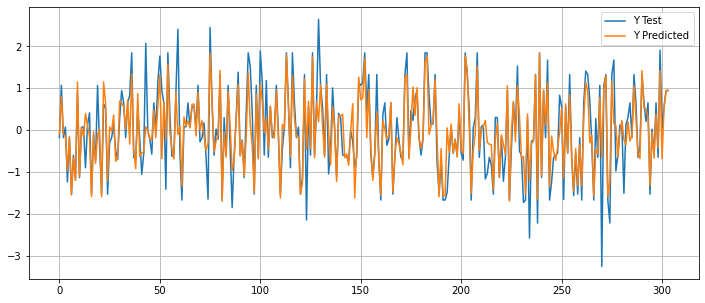

,0,"Модуль упругости при растяжении, ГПа"
0,-0.086385,-0.180406
1,0.798043,1.068463
2,-0.097939,-0.180406
3,-0.142481,0.070782
4,-0.958676,-1.236688
...,...,...
299,1.420868,1.908699
300,-0.689336,0.053348
301,0.574014,0.564074
302,0.938928,0.945320


In [74]:
#Модель 11
M11 = SVR()
M11.fit(M11_X_train_4,np.ravel(M11_y_train_4))
M11_pred = M11.predict(M11_X_test_4)
M11_test = M11_y_test_4.reset_index(drop=True,inplace=False)

fig, ax = plt.subplots(figsize=(12, 5))
ax.plot(M11_test, label='Y Test')
ax.plot(M11_pred, label='Y Predicted')
ax.legend()
plt.grid(1)
plt.savefig('out_pics//Model11')
plt.show()
pd.DataFrame(M11_pred).join(M11_test.reset_index(drop=True,inplace=False),  how='inner')


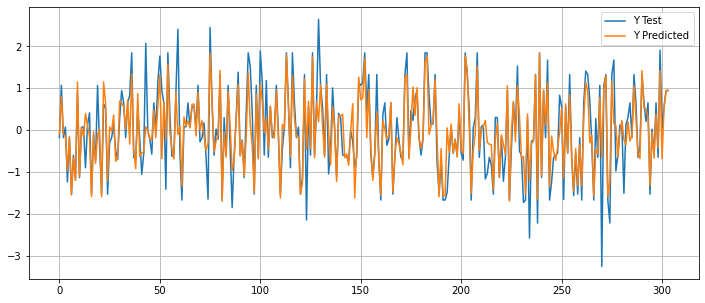

,0,"Прочность при растяжении, МПа"
0,-0.814837,-1.760681
1,1.067294,1.060640
2,-0.952939,-0.663497
3,0.900671,0.915486
4,-0.385373,-1.032939
...,...,...
299,-0.496613,0.060149
300,-1.372540,-1.568241
301,-0.395126,0.723650
302,-0.351496,-0.188194


In [73]:
#Модель2
M12 = RandomForestRegressor()
M12.fit(M12_X_train_3,np.ravel(M12_y_train_3))
M12_pred = M12.predict(M12_X_test_3)
M12_test = M12_y_test_3.reset_index(drop=True,inplace=False)

fig, ax = plt.subplots(figsize=(12, 5))
ax.plot(M11_test, label='Y Test')
ax.plot(M11_pred, label='Y Predicted')
ax.legend()
plt.grid(1)
plt.savefig('out_pics//Model12')
plt.show()
pd.DataFrame(M12_pred).join(M12_test.reset_index(drop=True,inplace=False),  how='inner')

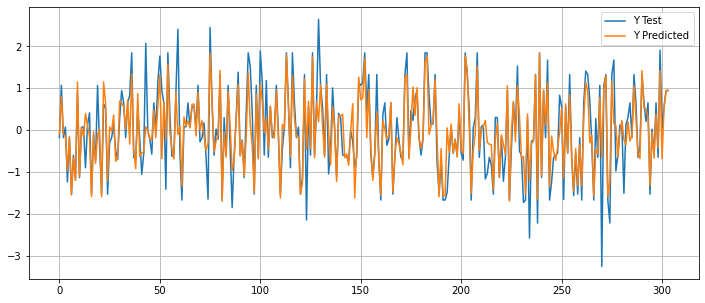

,0,Соотношение матрица-наполнитель
0,0.689981,-0.629977
1,-0.390767,-0.543938
2,0.886949,-0.199050
3,0.090856,0.050267
4,0.500649,-0.263980
...,...,...
299,1.694863,1.618054
300,-0.685291,-0.545521
301,1.681164,1.618054
302,0.392948,0.189190


In [75]:
#Модель 13
M13 = SVR()
M13.fit(M13_X_train_4,np.ravel(M13_y_train_4))
M13_pred = M13.predict(M13_X_test_4)
M13_test = M13_y_test_4.reset_index(drop=True,inplace=False)

fig, ax = plt.subplots(figsize=(12, 5))
ax.plot(M11_test, label='Y Test')
ax.plot(M11_pred, label='Y Predicted')
ax.legend()
plt.grid(1)
plt.savefig('out_pics//Model13')
plt.show()
pd.DataFrame(M13_pred).join(M13_test.reset_index(drop=True,inplace=False),  how='inner')

In [76]:
#Сохраним модели
import pickle
pickle.dump(M11, open('out_models//M11.pkl', 'wb'))
pickle.dump(M12, open('out_models//M12.pkl', 'wb'))
pickle.dump(M13, open('out_models//M13.pkl', 'wb'))

## 4.6. Нейронные сети

Целью данного раздела является попытка улучшения характеристик модели М13 по набоорам данных с 33% корректировкой и 66% корректировкой. По изначальному набору данных и по набору данных с 12% корректировкой выполнение задачи видится маловерооятным в связи с низкой сбалансированностью исходных данных.
Наборы данных будем использовать стандартизованные и изначально сформированные с целью использоания первого нормирующего слоя

In [77]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras.callbacks import ModelCheckpoint, EarlyStopping

print(tf.__version__)

2.9.1


In [79]:
def get_metrics(model_name, y, y_pred):
    stat = pd.DataFrame()
    stat.loc[model_name, 'R2'] = metrics.r2_score(y, y_pred)
    stat.loc[model_name, 'RMSE'] = metrics.mean_squared_error(y, y_pred, squared=False) * -1
    stat.loc[model_name, 'MAE'] = metrics.mean_absolute_error(y, y_pred) * -1
    stat.loc[model_name, 'MAPE'] = metrics.mean_absolute_percentage_error(y, y_pred) * -1
    stat.loc[model_name, 'max_error'] = metrics.max_error(y, y_pred) * -1
    return stat

In [81]:
def normalizer(X):
    normalizer = tf.keras.layers.Normalization(axis=-1)
    normalizer.adapt(np.array(X))
    return normalizer

In [162]:
# Визуализация
def plot_loss(history):
    plt.plot(history.history['loss'], label='loss')
    plt.plot(history.history['val_loss'], label='val_loss')
    plt.ylim([0, 5])
    plt.xlabel('Эпоха')
    plt.ylabel('MSE')
    plt.legend()
    plt.grid(True)

In [200]:
#Сформируем наборы X и Y

#1. По стандартизированным данным 33%
   # M13_X_train_3
   # M13_y_train_3
   # M13_X_test_3
   # M13_y_test_3

#2. По нестандартизированным данным 33%
M13_X_train_3_NO, M13_X_test_3_NO, M13_y_train_3_NO, M13_y_test_3_NO = train_test_split(df_union3[Mod_13_X], df_union3[Mod_13_y], test_size=0.3)
norm3 = normalizer(df_union3[Mod_13_X])

#3. По стандартизированным данным 66%
   # M13_X_train_4
   # M13_y_train_4
   # M13_X_test_4
   # M13_y_test_4

#4. По нестандартизированным данным 66%
M13_X_train_4_NO, M13_X_test_4_NO, M13_y_train_4_NO, M13_y_test_4_NO = train_test_split(df_union4[Mod_13_X], df_union4[Mod_13_y], test_size=0.3)
norm4 = normalizer(df_union4[Mod_13_X])

In [280]:
def nm1_n(norm):
    
    model = keras.Sequential([
         norm,
          layers.Dense(64, activation='relu'),
          layers.Dense(64, activation='relu'),
          layers.Dense(32, activation='relu'),
          layers.Dense(32, activation='relu'),      
          layers.Dropout(0.5),
          layers.Dense(64, activation='relu'),
          layers.Dense(32, activation='relu'),
          layers.Dense(16, activation='sigmoid'),
          layers.Dropout(0.6),
          layers.Dense(32, activation='relu'),
          layers.Dense(16, activation='sigmoid'),
          layers.Dropout(0.4),
          layers.Dense(8, activation='relu'),
          layers.Dense(1)
        ])
    model.compile(loss='mean_squared_error',
                optimizer=tf.keras.optimizers.Adam(0.0001))
    return model

In [281]:
def nm2_n(norm):
    
    model = keras.Sequential([
          norm,
          layers.Dense(64, activation='relu'),
          layers.Dense(64, activation='relu'), 
          layers.Dense(32, activation='relu'),      
          layers.Dropout(0.5),
          layers.Dense(64, activation='relu'),
          layers.Dense(32, activation='relu'),
          layers.Dense(32, activation='relu'),
          layers.Dropout(0.6),
          layers.Dense(32, activation='relu'),
          layers.Dense(16, activation='relu'),
          layers.Dropout(0.4),
          layers.Dense(8, activation='relu'),
          layers.Dense(1)
        ])
    model.compile(loss='mean_squared_error',
                optimizer=tf.keras.optimizers.Adam(0.001))
    return model

In [282]:
def nm3_n(norm):
    model = keras.Sequential([
      norm,    
      layers.Dense(32, activation='relu'),
      layers.Dense(32, activation='relu'),
      layers.Dense(32, activation='relu'),  
      layers.Dropout(0.6),
      layers.Dense(16, activation='relu'),
      layers.Dense(16, activation='relu'), 
      layers.Dense(16, activation='relu'), 
      layers.Dropout(0.6),
      layers.Dense(64, activation='relu'),
      layers.Dense(32, activation='relu'),
      layers.Dense(16, activation='relu'),
      layers.Dense(1) ])

    model.compile(loss='mean_absolute_error',
                optimizer=tf.keras.optimizers.RMSprop(0.001))
    return model

In [283]:
def nm1():
    
    model = keras.Sequential([
         
          layers.Dense(64, activation='relu'),
          layers.Dense(64, activation='relu'),
          layers.Dense(32, activation='relu'),
          layers.Dense(32, activation='relu'),      
          layers.Dropout(0.5),
          layers.Dense(64, activation='relu'),
          layers.Dense(32, activation='relu'),
          layers.Dense(32, activation='sigmoid'),
          layers.Dropout(0.4),
          layers.Dense(32, activation='relu'),
          layers.Dense(32, activation='sigmoid'),
          layers.Dropout(0.5),
          layers.Dense(16, activation='relu'),
          layers.Dense(1), 
         
         layers.Dense(1)
        ])
    model.compile(loss='mean_squared_error',
                optimizer=tf.keras.optimizers.Adam(0.0001))
    return model

In [284]:
def nm2():
    
    model = keras.Sequential([
          
          layers.Dense(64, activation='relu'),
          layers.Dense(64, activation='relu'), 
          layers.Dense(32, activation='relu'),      
          layers.Dropout(0.5),
          layers.Dense(64, activation='relu'),
          layers.Dense(32, activation='relu'),
          layers.Dense(16, activation='relu'),
          layers.Dropout(0.6),
          layers.Dense(32, activation='relu'),
          layers.Dense(16, activation='relu'),
          layers.Dropout(0.4),
          layers.Dense(8, activation='relu'),
          layers.Dense(1)
        ])
    model.compile(loss='mean_squared_error',
                optimizer=tf.keras.optimizers.Adam(0.001))
    return model

In [285]:
def nm3():
    model = keras.Sequential([
       
      layers.Dense(32, activation='relu'),
      layers.Dense(32, activation='relu'),
      layers.Dense(32, activation='relu'),  
      layers.Dropout(0.6),
      layers.Dense(16, activation='relu'),
      layers.Dense(16, activation='relu'), 
      layers.Dense(16, activation='relu'), 
      layers.Dropout(0.6),
      layers.Dense(64, activation='relu'),
      layers.Dense(32, activation='relu'),
      layers.Dense(16, activation='relu'),
      layers.Dense(1)
    ])

    model.compile(loss='mean_absolute_error',
                optimizer=tf.keras.optimizers.RMSprop(0.001))
    return model

In [286]:
# Комплекс нейронных сетей с нормализацией
res_k1 = pd.DataFrame()
net_1 = nm1_n(norm3)
history1 = net_1.fit(
    M13_X_train_3_NO.values,
    M13_y_train_3_NO.values,
    epochs=100,
    verbose=0,
    validation_split = 0.3)
print('net1')
net_2 = nm2_n(norm3)
history2 = net_2.fit(
    M13_X_train_3_NO.values,
    M13_y_train_3_NO.values,
    epochs=20,
    verbose=0,
    validation_split = 0.2)
print('net2')
net_3 = nm3_n(norm3)
history3 = net_3.fit(
    M13_X_train_3_NO.values,
    M13_y_train_3_NO.values,
    epochs=50,
    verbose=0,
    validation_split = 0.3)
print('net1')

res_k1 = pd.concat([res_k1, get_metrics('net_1_n_3', M13_y_test_3_NO, net_1.predict(M13_X_test_3_NO)),
                            get_metrics('net_2_n_3', M13_y_test_3_NO, net_2.predict(M13_X_test_3_NO)),
                            get_metrics('net_3_n_3', M13_y_test_3_NO, net_3.predict(M13_X_test_3_NO))])

net1
net2
net1
10/10 [==============================] - 0s 1ms/step


In [287]:
res_k2 = pd.DataFrame()
net_4 = nm1_n(norm4)
history4 = net_4.fit(
    M13_X_train_4_NO.values,
    M13_y_train_4_NO.values,
    epochs=100,
    verbose=0,
    validation_split = 0.3)
print('net1')
net_5 = nm2_n(norm4)
history5 = net_5.fit(
    M13_X_train_4_NO.values,
    M13_y_train_4_NO.values,
    epochs=20,
    verbose=0,
    validation_split = 0.2)
print('net2')
net_6 = nm3_n(norm4)
history6 = net_6.fit(
    M13_X_train_4_NO.values,
    M13_y_train_4_NO.values,
    epochs=50,
    verbose=0,
    validation_split = 0.3)
print('net1')

res_k2 = pd.concat([res_k2, get_metrics('net_1_n_4', M13_y_test_4_NO, net_1.predict(M13_X_test_4_NO)),
                          get_metrics('net_2_n_4', M13_y_test_4_NO, net_2.predict(M13_X_test_4_NO)),
                          get_metrics('net_3_n_4', M13_y_test_4_NO, net_3.predict(M13_X_test_4_NO))])

net1
net2
net1
10/10 [==============================] - 0s 2ms/step


In [288]:
#Комплекс для сетей без нормализации
res_k3 = pd.DataFrame()
net_7 = nm1()
history7 = net_7.fit(
    M13_X_train_3.values,
    M13_y_train_3.values,
    epochs=80,
    verbose=0,
    validation_split = 0.3)
print('net1')
net_8 = nm2()
history8 = net_8.fit(
    M13_X_train_3.values,
    M13_y_train_3.values,
    epochs=20,
    verbose=0,
    validation_split = 0.2)
print('net2')
net_9 = nm3()
history9 = net_9.fit(
    M13_X_train_3.values,
    M13_y_train_3.values,
    epochs=50,
    verbose=0,
    validation_split = 0.3)
print('net1')


res_k3 =   pd.concat([res_k3, get_metrics('net_1_3', M13_y_test_3, net_1.predict(M13_X_test_3)),
                            get_metrics('net_2_3', M13_y_test_3, net_2.predict(M13_X_test_3)),
                            get_metrics('net_3_3', M13_y_test_3, net_3.predict(M13_X_test_3))])

net1
net2
net1
10/10 [==============================] - 0s 997us/step


In [289]:
#Комплекс для сетей без нормализации
res_k4 = pd.DataFrame()
net_10 = nm1()
history10 = net_10.fit(
    M13_X_train_4.values,
    M13_y_train_4.values,
    epochs=100,
    verbose=0,
    validation_split = 0.2)
print('net1')
net_11 = nm2()
history11 = net_11.fit(
    M13_X_train_4.values,
    M13_y_train_4.values,
    epochs=20,
    verbose=0,
    validation_split = 0.2)
print('net2')
net_12 = nm3()
history12 = net_12.fit(
    M13_X_train_4.values,
    M13_y_train_4.values,
    epochs=50,
    verbose=0,
    validation_split = 0.3)
print('net1')

res_k4 =   pd.concat([res_k4, get_metrics('net_1_4', M13_y_test_4, net_1.predict(M13_X_test_4)),
                            get_metrics('net_2_4', M13_y_test_4, net_2.predict(M13_X_test_4)),
                            get_metrics('net_3_4', M13_y_test_4, net_3.predict(M13_X_test_4))])

net1
net2
net1
10/10 [==============================] - 0s 1ms/step


In [303]:
res_k = pd.DataFrame()
res_k =   pd.concat([res_k1, res_k2, res_k3, res_k4])
res_k = res_k.sort_values(by='R2', ascending=False)
res_k.to_excel("out_xls//res_k.xlsx")
res_k

,R2,RMSE,MAE,MAPE,max_error
net_1_n_4,0.000245,-0.372993,-0.291748,-0.101408,-1.783102
net_1_n_3,-0.000096,-0.542071,-0.393315,-0.151493,-2.022241
net_3_n_3,-0.025008,-0.548781,-0.405766,-0.151952,-1.950605
net_3_n_4,-0.050176,-0.382283,-0.293899,-0.099477,-1.870926
net_2_n_3,-0.580006,-0.681341,-0.554922,-0.187814,-2.209125
net_2_n_4,-1.131751,-0.544656,-0.430426,-0.138440,-2.180530
net_1_3,-8.318406,-3.037342,-2.876429,-76.591224,-5.436638
net_1_4,-9.002839,-3.058803,-2.925103,-17.118289,-5.296246
net_2_3,-19.446785,-4.499202,-4.388396,-116.410387,-6.941596
net_2_4,-20.890500,-4.524991,-4.424125,-25.922054,-6.793174


Из приоженной таблицы видно, что лучшая сеть получислась при следующих результатах
         
      layers.Dense(64, activation='relu'),
          layers.Dense(64, activation='relu'),
          layers.Dense(32, activation='relu'),
          layers.Dense(32, activation='relu'),      
          layers.Dropout(0.5),
          layers.Dense(64, activation='relu'),
          layers.Dense(32, activation='relu'),
          layers.Dense(32, activation='sigmoid'),
          layers.Dropout(0.4),
          layers.Dense(32, activation='relu'),
          layers.Dense(32, activation='sigmoid'),
          layers.Dropout(0.5),
          layers.Dense(16, activation='relu'),
          layers.Dense(1),
 epochs=100
Но все равно результат получился Значительно хуже, чем при прогнозировании методом регрессионного анализа SVR(). Можно сказать, что нейронную сеть не удалось подобрать

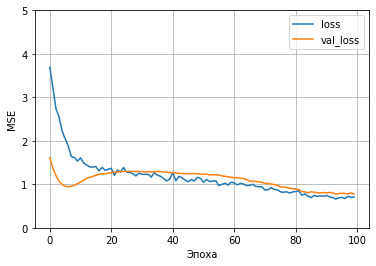

In [302]:
#Отобразим процесс обучения 
plot_loss(history10)
plt.savefig('out_pics//net_1_4')

In [296]:
predict = net_10.predict(M13_X_test_4)


10/10 [==============================] - 0s 1ms/step


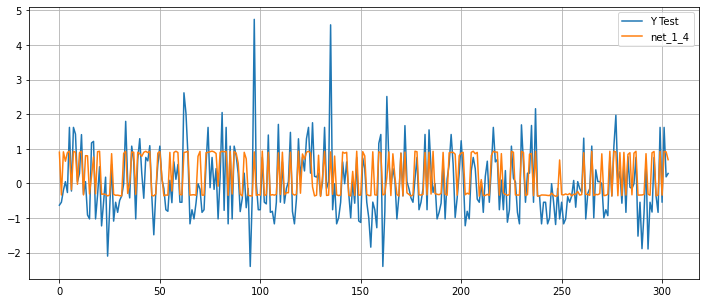

In [300]:
fig, ax = plt.subplots(figsize=(12, 5))
ax.plot(M13_y_test_4.reset_index(drop=True,inplace=False), label='Y Test')
ax.plot(predict, label='net_1_4')
plt.grid(1)
ax.legend()
plt.savefig('out_pics//Graph_net_1_4')
plt.show()


In [301]:
#Сохраним модели нейронной сети
net_10.save('out_models//Graph_net_1_4')

INFO:tensorflow:Assets written to: out_models//Graph_net_1_4\assets


# 5. Общий вывод

Результаты по трем моделям достигаются лишь при существенной корректировке исходных данных, что косвенно может говорить об остуствиии подствержденных экспериментальых данных в исходном датасете и о сильной разбалансировке исходного датасета.
В качестве направлений для дальнейшего исследования датасета можно определить:
 1. Оптимизация алгоритма корректировки датасета
 2. Подбор оптимальных параметров между процентом корректировки датасета и полученной точностью прогнозирования результатов
 3. Поиск нейронной сети, повышающей точность использования прочих алгоритмов

In [46]:
import pickle

In [49]:
load_model=pickle.load(open('M11.pkl','rb'))

In [51]:
s1 =1
s2 =2
s3 =3
s4 =4
s5 =5
s6 =6
s7 =7
s8 =8
s9 =9
s10 =10
s11 =11
s12 =12



data = {'Угол нашивки, град':s1,
                     'Шаг нашивки': s2,
                     'Плотность нашивки': s3,
                     'Соотношение матрица-наполнитель': s4,
                     'Плотность, кг/м3': s5,
                     'модуль упругости, ГПа': s6,
                     'Количество отвердителя, м.%': s7,
                     'Содержание эпоксидных групп,%_2': s8,
                     'Температура вспышки, С_2': s9,
                     'Поверхностная плотность, г/м2': s10,
                     'Прочность при растяжении, МПа': s11,
                     'Потребление смолы, г/м2': s12}
x = pd.DataFrame(data, index=[0])

In [52]:
y = load_model.predict(x)

In [56]:
str(y)

'[0.16707696]'